In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('/content/drive/MyDrive/Vistula_BDA/Fraud_Data.csv')

In [62]:
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [63]:
df.shape

(151112, 11)

In [64]:
df['class'].value_counts()

,count
class,
0,136961
1,14151


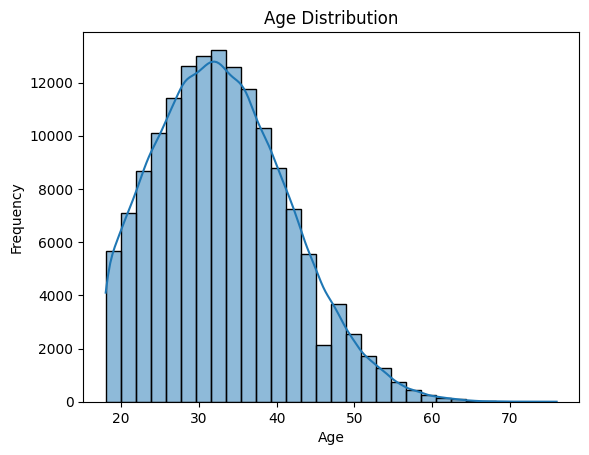

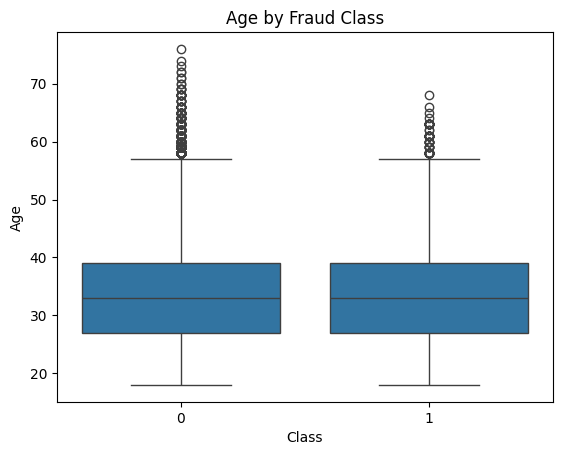

In [65]:
# Age Distribution Plot
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Purchase Value by Class
sns.boxplot(x='class', y='age', data=df)
plt.title('Age by Fraud Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

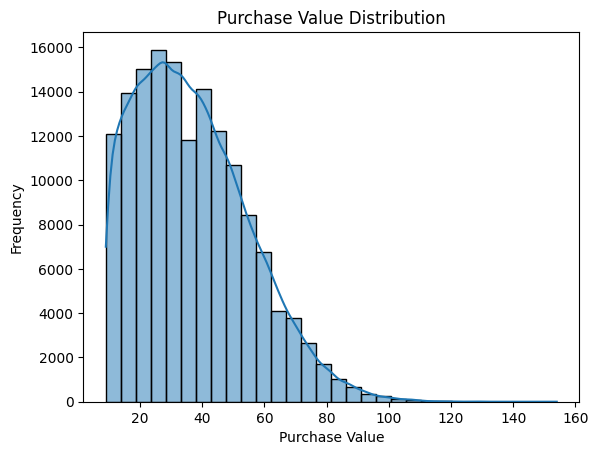

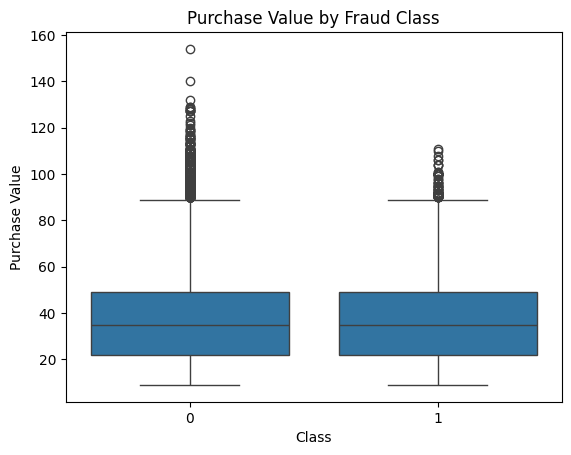

In [66]:
# Purchase_value Distribution Plot
sns.histplot(df['purchase_value'], bins=30, kde=True)
plt.title('Purchase Value Distribution')
plt.xlabel('Purchase Value')
plt.ylabel('Frequency')
plt.show()

# Purchase Value by Class
sns.boxplot(x='class', y='purchase_value', data=df)
plt.title('Purchase Value by Fraud Class')
plt.xlabel('Class')
plt.ylabel('Purchase Value')
plt.show()

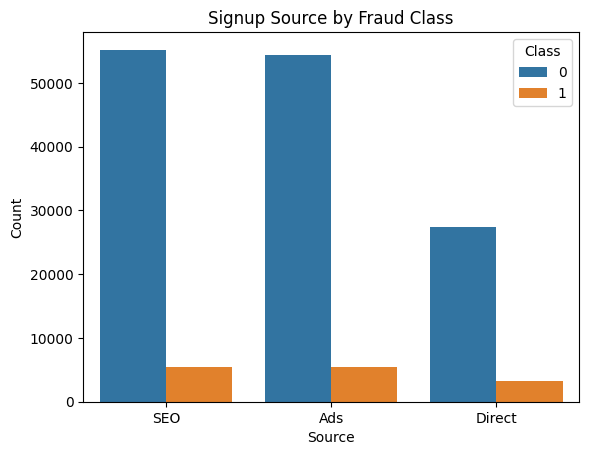

In [67]:
#  Signup Source by Class
sns.countplot(x='source', hue='class', data=df)
plt.title('Signup Source by Fraud Class')
plt.xlabel('Source')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

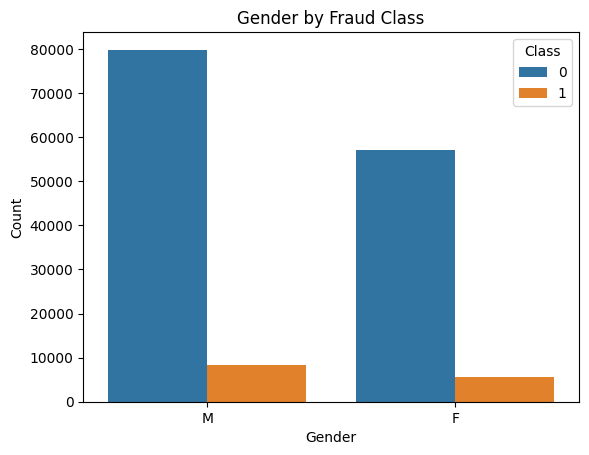

In [68]:
#  Gender Distribution
sns.countplot(x='sex', hue='class', data=df)
plt.title('Gender by Fraud Class')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Class')
plt.show()

In [69]:
# Computed the fraud rate for each gender (Fraud Rate = Fraud Cases / Total Transactions (for each gender))
# Create data
from scipy.stats import chi2_contingency
gender_fraud_counts = pd.crosstab(df['sex'], df['class'])
gender_fraud_counts.columns = ['Non-Fraud', 'Fraud']
gender_fraud_counts['Total'] = gender_fraud_counts['Non-Fraud'] + gender_fraud_counts['Fraud']
gender_fraud_counts['Fraud Rate (%)'] = (gender_fraud_counts['Fraud'] / gender_fraud_counts['Total']) * 100

print("Fraud statistics by gender:\n", gender_fraud_counts)

# Chi-squared test
chi2, p_value, dof, expected = chi2_contingency(gender_fraud_counts[['Non-Fraud', 'Fraud']])
print(f"\nChi-squared statistic = {chi2:.2f}")
print(f"P-value = {p_value:.4f}")


Fraud statistics by gender:
      Non-Fraud  Fraud  Total  Fraud Rate (%)
sex                                         
F        57102   5717  62819        9.100750
M        79859   8434  88293        9.552286

Chi-squared statistic = 8.76
P-value = 0.0031


**IP Address**

In [70]:
# Top IPs by number of users
top_ips = df['ip_address'].value_counts().head(10)
print("Top 10 IP addresses by frequency:\n", top_ips)

# Fraud rate by IP
ip_fraud_stats = df.groupby('ip_address')['class'].agg(['count', 'sum'])
ip_fraud_stats.columns = ['Total_Users', 'Fraud_Count']
ip_fraud_stats['Fraud_Rate'] = ip_fraud_stats['Fraud_Count'] / ip_fraud_stats['Total_Users']

# Sort by Fraud Rate
ip_fraud_sorted = ip_fraud_stats[ip_fraud_stats['Total_Users'] > 10].sort_values('Fraud_Rate', ascending=False).head(10)
print("\nTop IPs by Fraud Rate:\n", ip_fraud_sorted)

Top 10 IP addresses by frequency:
 ip_address
3.874758e+09    20
2.050964e+09    20
1.502818e+09    20
5.760609e+08    20
2.937899e+09    19
2.586669e+09    19
1.800550e+09    19
3.058785e+09    19
3.484934e+08    19
1.797069e+09    19
Name: count, dtype: int64

Top IPs by Fraud Rate:
               Total_Users  Fraud_Count  Fraud_Rate
ip_address                                        
3.905319e+09           11           11         1.0
3.855236e+09           12           12         1.0
3.969919e+09           11           11         1.0
2.614813e+08           16           16         1.0
5.091162e+08           12           12         1.0
3.484934e+08           19           19         1.0
3.666645e+09           14           14         1.0
1.829815e+09           11           11         1.0
2.024709e+09           13           13         1.0
1.200869e+09           14           14         1.0


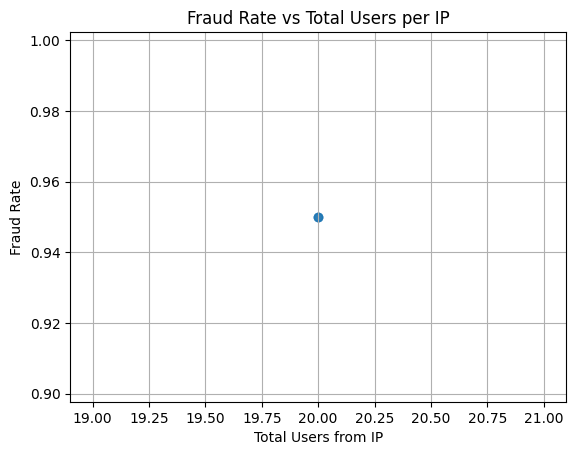

In [71]:
# Fraud Rate vs. Total Users per IP:
# Filter for IPs with at least 20 users to avoid noise
filtered = ip_fraud_stats[ip_fraud_stats['Total_Users'] >= 20]

plt.scatter(filtered['Total_Users'], filtered['Fraud_Rate'], alpha=0.5)
plt.xlabel("Total Users from IP")
plt.ylabel("Fraud Rate")
plt.title("Fraud Rate vs Total Users per IP")
plt.grid(True)
plt.show()

In [72]:
# Flag IPs with high fraud rate
suspicious_ips = ip_fraud_stats[ip_fraud_stats['Fraud_Rate'] > 0.5].index
df['ip_is_suspicious'] = df['ip_address'].isin(suspicious_ips).astype(int)
df['ip_is_suspicious']

,ip_is_suspicious
0,0
1,0
2,1
3,0
4,0
...,...
151107,1
151108,0
151109,0
151110,0


**Device_ID**

Top 10 device IDs by usage:
 device_id
NGQCKIADMZORL    20
EQYVNEGOFLAWK    20
ZUSVMDEZRBDTX    20
ITUMJCKWEYNDD    20
CQTUVBYIWWWBC    20
KIPFSCNUGOLDP    20
SDJQRPKXQFBED    19
CDFXVYHOIHPYP    19
BWSMVSLCJXMCM    19
IGKYVZDBEGALB    19
Name: count, dtype: int64
High-risk devices:
                Total_Users  Fraud_Count  Fraud_Rate
device_id                                          
ZAZYLIQMWLANX           11           11         1.0
VSZLPCXAISHQC           16           16         1.0
WDQRJNMUCCKLZ           14           14         1.0
BQFVIFYBACRXO           12           12         1.0
VFCDOALISXNHX           12           12         1.0
MQGEVZIVNVZFL           11           11         1.0
NEDQGMKXTGBFF           11           11         1.0
LQOVYJCFDDWKF           14           14         1.0
OJEQWCXKUCCES           10           10         1.0
EPILONTXYYWPF           14           14         1.0


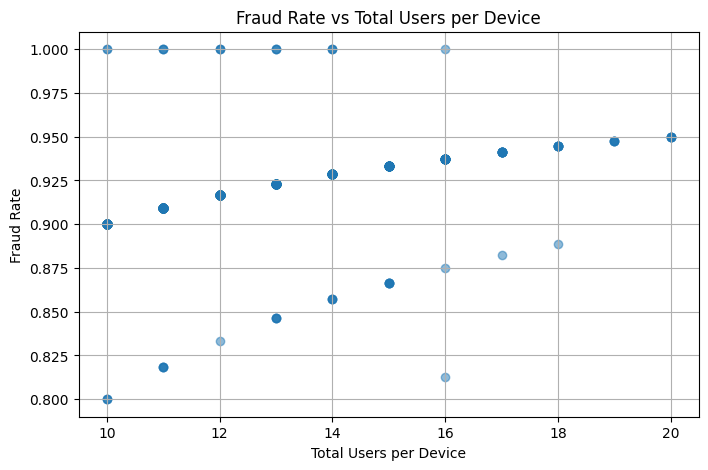

0         0
1         0
2         1
3         0
4         0
         ..
151107    0
151108    0
151109    0
151110    0
151111    0
Name: device_is_suspicious, Length: 151112, dtype: int64


In [73]:
# Step 1: Basic Frequency Analysis
top_devices = df['device_id'].value_counts().head(10)
print("Top 10 device IDs by usage:\n", top_devices)

# Step 2: Fraud Rate by Device
# Group by device_id to compute fraud rate
device_fraud_stats = df.groupby('device_id')['class'].agg(['count', 'sum'])
device_fraud_stats.columns = ['Total_Users', 'Fraud_Count']
device_fraud_stats['Fraud_Rate'] = device_fraud_stats['Fraud_Count'] / device_fraud_stats['Total_Users']

# Sort by fraud rate and volume
high_risk_devices = device_fraud_stats[device_fraud_stats['Total_Users'] >= 10]\
                    .sort_values(by='Fraud_Rate', ascending=False).head(10)

print("High-risk devices:\n", high_risk_devices)

# Step 3: Visualize Fraud Rate vs Device Usage
filtered = device_fraud_stats[device_fraud_stats['Total_Users'] >= 10]

plt.figure(figsize=(8, 5))
plt.scatter(filtered['Total_Users'], filtered['Fraud_Rate'], alpha=0.5)
plt.xlabel('Total Users per Device')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate vs Total Users per Device')
plt.grid(True)
plt.show()

# Step 4: Flag Suspicious Devices
# Flag devices with very high fraud rate (e.g., > 50%)
suspicious_devices = device_fraud_stats[device_fraud_stats['Fraud_Rate'] > 0.5].index
df['device_is_suspicious'] = df['device_id'].isin(suspicious_devices).astype(int)
print(df['device_is_suspicious'])

**time_diff**

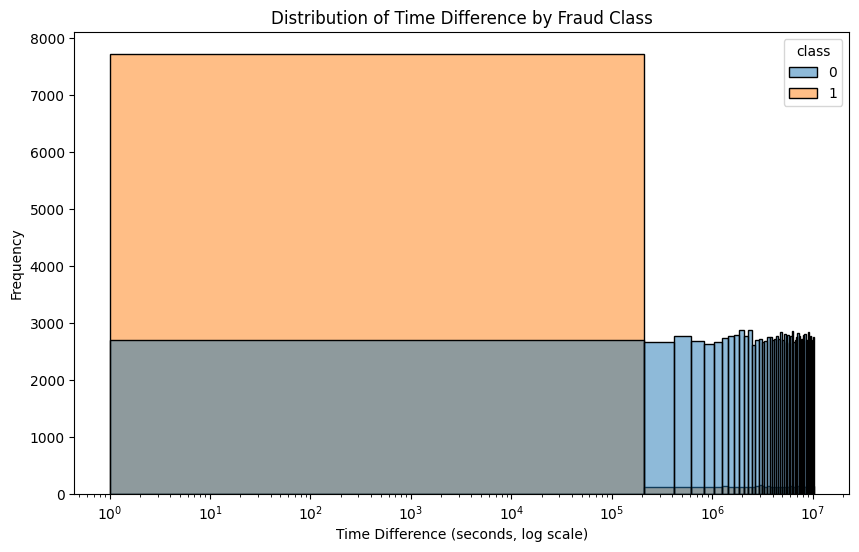

Mann-Whitney U statistic: 1485647304.0, p-value: 0.0
                   time_diff_seconds     class
time_diff_seconds           1.000000 -0.257888
class                      -0.257888  1.000000
                   time_diff_seconds     class
time_diff_seconds           1.000000 -0.269008
class                      -0.269008  1.000000
time_diff_bin
<1m     1.000000
1-5m    0.000000
>5m     0.045648
Name: class, dtype: float64
-------------------------
0         0
1         0
2         1
3         0
4         0
         ..
151107    0
151108    0
151109    0
151110    0
151111    0
Name: is_short_time, Length: 151112, dtype: int64


In [74]:
from scipy.stats import mannwhitneyu
#  Step 1: Calculate time_diff
df['signup_time'] = pd.to_datetime(df['signup_time'])
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
df['time_diff_seconds'] = (df['purchase_time'] - df['signup_time']).dt.total_seconds()

# Step 2: Explore the Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='time_diff_seconds', hue='class', bins=50, common_norm=False)
plt.xscale('log')  # Use log scale due to potential wide range
plt.title("Distribution of Time Difference by Fraud Class")
plt.xlabel("Time Difference (seconds, log scale)")
plt.ylabel("Frequency")
plt.show()
#  Step 3: Statistical Analysis

stat, p = mannwhitneyu(df[df['class'] == 0]['time_diff_seconds'],
                       df[df['class'] == 1]['time_diff_seconds'])
print(f"Mann-Whitney U statistic: {stat}, p-value: {p}")
#  Step 4: Correlation with class
print(df[['time_diff_seconds', 'class']].corr(method='pearson'))
print(df[['time_diff_seconds', 'class']].corr(method='spearman'))

# Step 5: Identify Thresholds
df['time_diff_bin'] = pd.cut(df['time_diff_seconds'], bins=[0, 60, 300, float('inf')], labels=['<1m', '1-5m', '>5m'])
print(df.groupby('time_diff_bin')['class'].mean())
#
# Step 6: Create binary flags for short intervals
df['is_short_time'] = (df['time_diff_seconds'] < 60).astype(int)
print("-------------------------")
print(df['is_short_time'])

**3.4. Correlation Analysis**

**3.4.1. Encode features**

In [75]:
from sklearn.preprocessing import LabelEncoder

# Encode "Sex"
sex_mapping = {'M': 0, 'F': 1}
df['gender'] = df['sex'].map(sex_mapping)
df['gender']

# Encode "Source"
# Initialize the LabelEncoder
le = LabelEncoder()
df['source_encoded'] = le.fit_transform(df['source'])
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} -> {encoded}")

print(df[['source', 'source_encoded']].head(10))

# # Encode "Browser"
df['browser_encoded'] = le.fit_transform(df['browser'])
for original, encoded in zip(le.classes_, range(len(le.classes_))):
    print(f"{original} -> {encoded}")

print(df[['browser', 'browser_encoded']].head(10))

Ads -> 0
Direct -> 1
SEO -> 2
  source  source_encoded
0    SEO               2
1    Ads               0
2    SEO               2
3    SEO               2
4    Ads               0
5    Ads               0
6    Ads               0
7    Ads               0
8    SEO               2
9    Ads               0
Chrome -> 0
FireFox -> 1
IE -> 2
Opera -> 3
Safari -> 4
  browser  browser_encoded
0  Chrome                0
1  Chrome                0
2   Opera                3
3  Safari                4
4  Safari                4
5  Chrome                0
6  Chrome                0
7   Opera                3
8      IE                2
9      IE                2


In [76]:
df_encoded = df[['purchase_value', 'gender', 'source_encoded', 'browser_encoded', 'ip_is_suspicious', 'device_is_suspicious', 'is_short_time', 'class']]
df_encoded.to_csv('df_encoded.csv', index=False)

**3.4.2. Correlation**

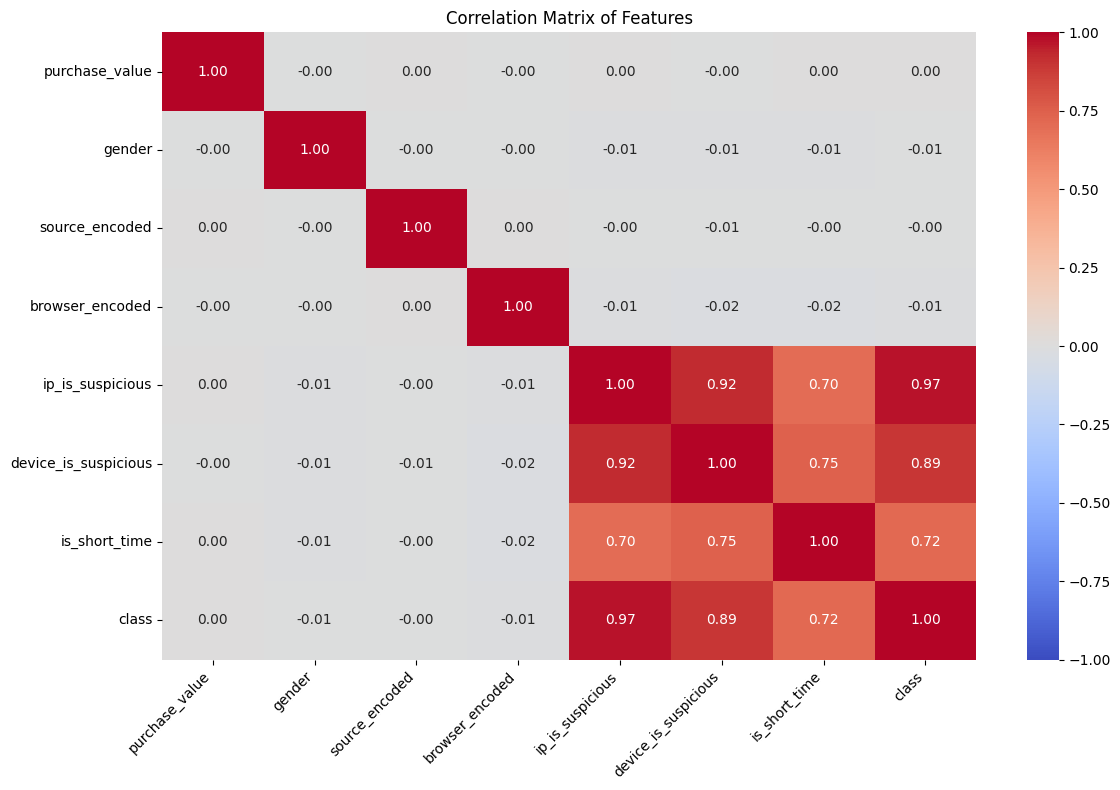

In [77]:
# Compute correlation matrix
correlation_matrix = df_encoded.corr(method='pearson')  # Use 'spearman' for non-linear relationships
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title("Correlation Matrix of Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Choosing Important Features for Training**

In [78]:
df_train = df_encoded[['ip_is_suspicious', 'device_is_suspicious', 'is_short_time', 'class']]
df_train.to_csv('df_train.csv', index=False)